#### Name: 

# PHYS 230 Lab Assignment 4

### Monday, February 2, 2026: Chapter 3.1-3.2
- Graphing in python - Matplotlib PyPlot
- Scatter plots

#### Start by importing any packages you need below (feel free to update as you go):

In [2]:
import numpy as np
import math
import ipympl as ipy
import matplotlib.pyplot as plt
import os
import random

## Catch the errors! (20 pts - 5 pts each)

**Please read directions carefully**

For each of the following cells, find the error (or errors), and correct it (or them) by:<br> 
    a. edit the problem cell with the corrected code so it will run [do not add a new cell] <br>
    b. below the cell, add a new markdown cell that describes what was wrong with the code<br>
<br>
**Make sure to write in complete sentences; corrected code with a poorly written explanation will not receive better than 4 of 5 points on a given question.** I am not looking for a lengthy explanation; but one that is sufficiently detailed to explain the errors. 

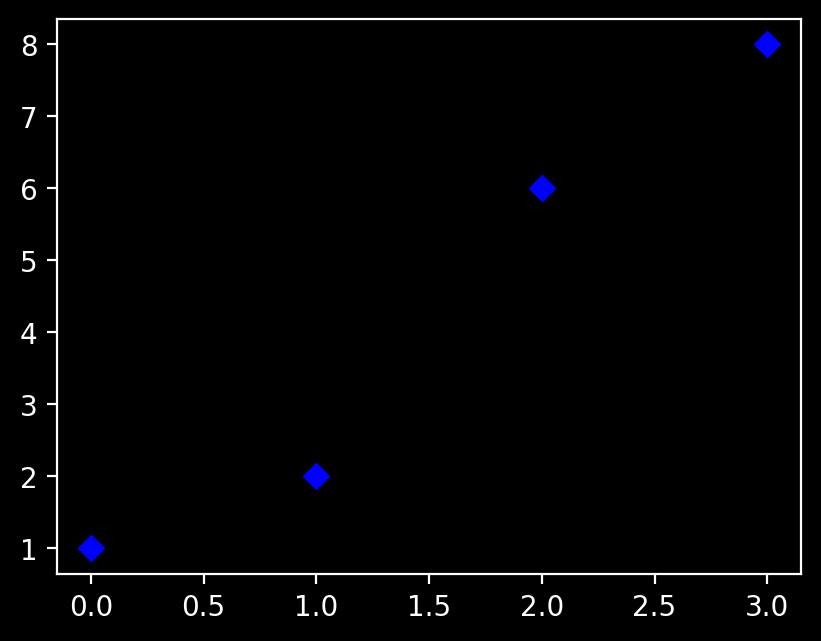

In [5]:
#1 - create a list and plot it
%matplotlib inline
x=[1,2,6,8]
plt.plot(x,'bD')
plt.show()

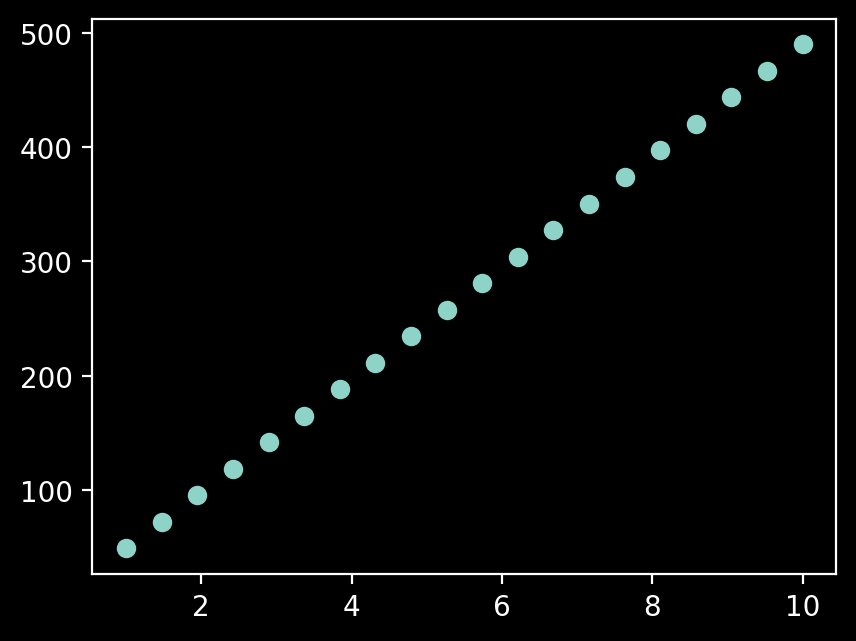

In [10]:
#2 
# instructions: make a plot of potential energy (E) of a 5 kg object given a range of heights (h) using circle markers
h = np.linspace(1,10,20)
m = 5
g = 9.8
E = m*g*h
plt.plot(h,E,"o")

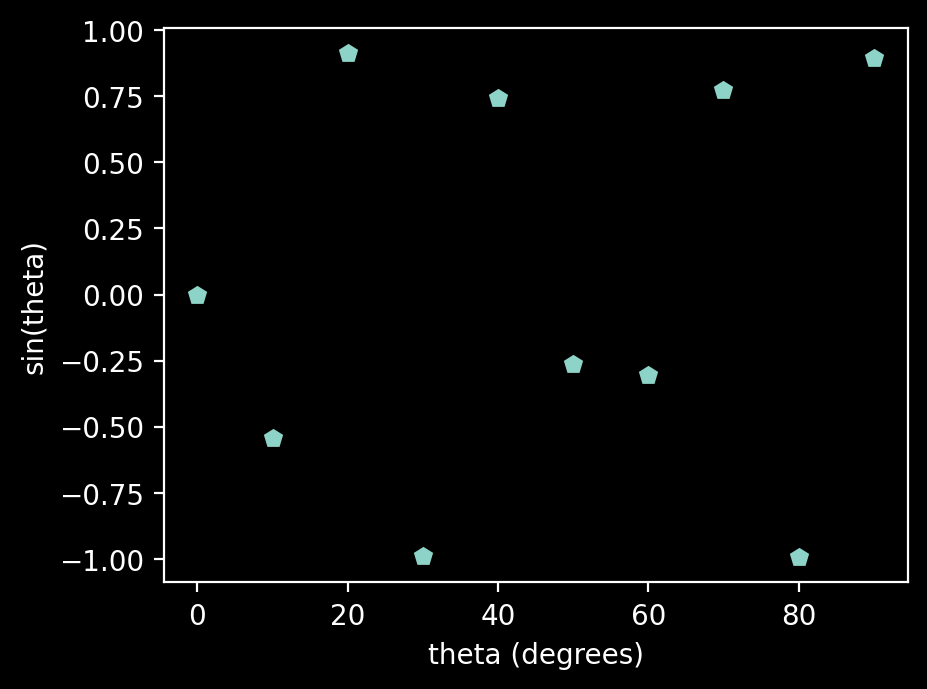

In [6]:
#3 plotting a graph of sin(theta) vs. theta with axis labels
theta = np.linspace(0,90,10)
y = np.sin(theta)
plt.plot(theta, y, "p")
plt.xlabel('theta (degrees)')
plt.ylabel('sin(theta)')
plt.show()

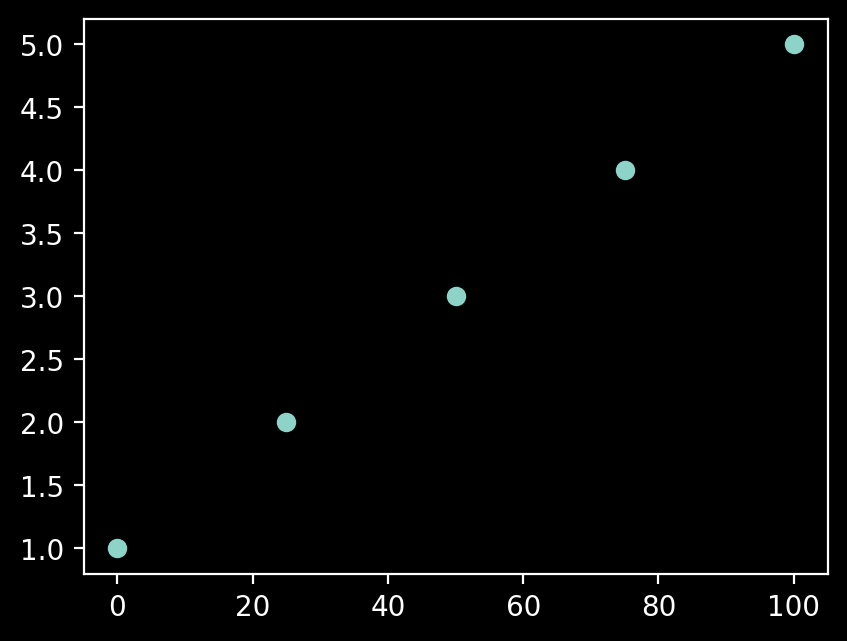

In [10]:
#4 - making a scatter plot of the array a and list b
a = np.linspace(0,100,5)
b = [1,2,3,4,5]
plt.scatter(a,b)

## Short python snippets (10 pts - 5 pts each)
Below each markdow cell, write a short python snippet to perform the indicated action; you will likely have to use google to find out how to perform some of these actions--this is deliberate on my part. Google and *stack overflow* are your friends.<br>
Add a markdown cell to explain your thinking if this is needed.

1. Create a list of 10 random integers between 0 and 20 and plot them. (You should look up how to make it random!)

In [14]:
import random
random_numbas = [random.randint(1,20) for _ in range(10)]
print(random_numbas)

[19, 16, 12, 10, 9, 9, 20, 17, 14, 18]


2. Make a scatter plot of two random independent arrays with 50 floating point values. Make all points larger & magenta. 

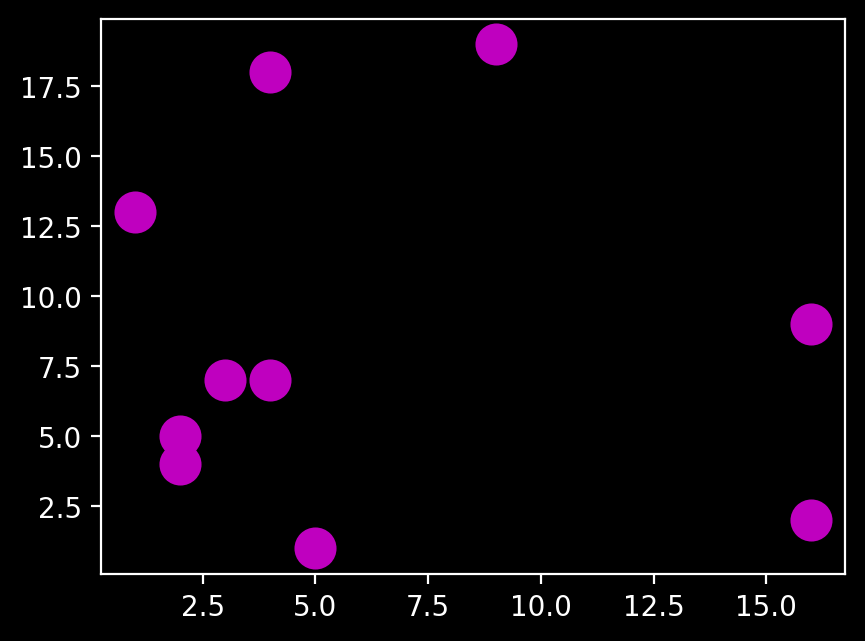

In [20]:
random_a = np.random.randint(1,20, size=10)
random_b = np.random.randint(1,20, size=10)
plt.scatter(random_a, random_b, c="m", s=200)

### Write a script 1 (27 pts)
#### Plotting a wave

Write a code to do the following: 
- Create an array "t" that consists of float points between 0 and 20. 
    - Make sure to use enough points so that the graph looks smooth
- Assuming this is wave data following the equation $y(t) = A\sin(\omega t)$, calculate $y$ using $\omega = 0.5$. 
    - Ask the user for the value of $A$. 
- Make a plot of $y$ vs $t$, making all points cyan diamond markers 
- Add a second set of data to your plot using cosine instead
    - You choose the color and marker style (must be different from sine)
- Don't forget to add a title and label your axes

When your program is complete, add a markdown cell below it to explain your process and program. 

Enter amplitude value (A): 5


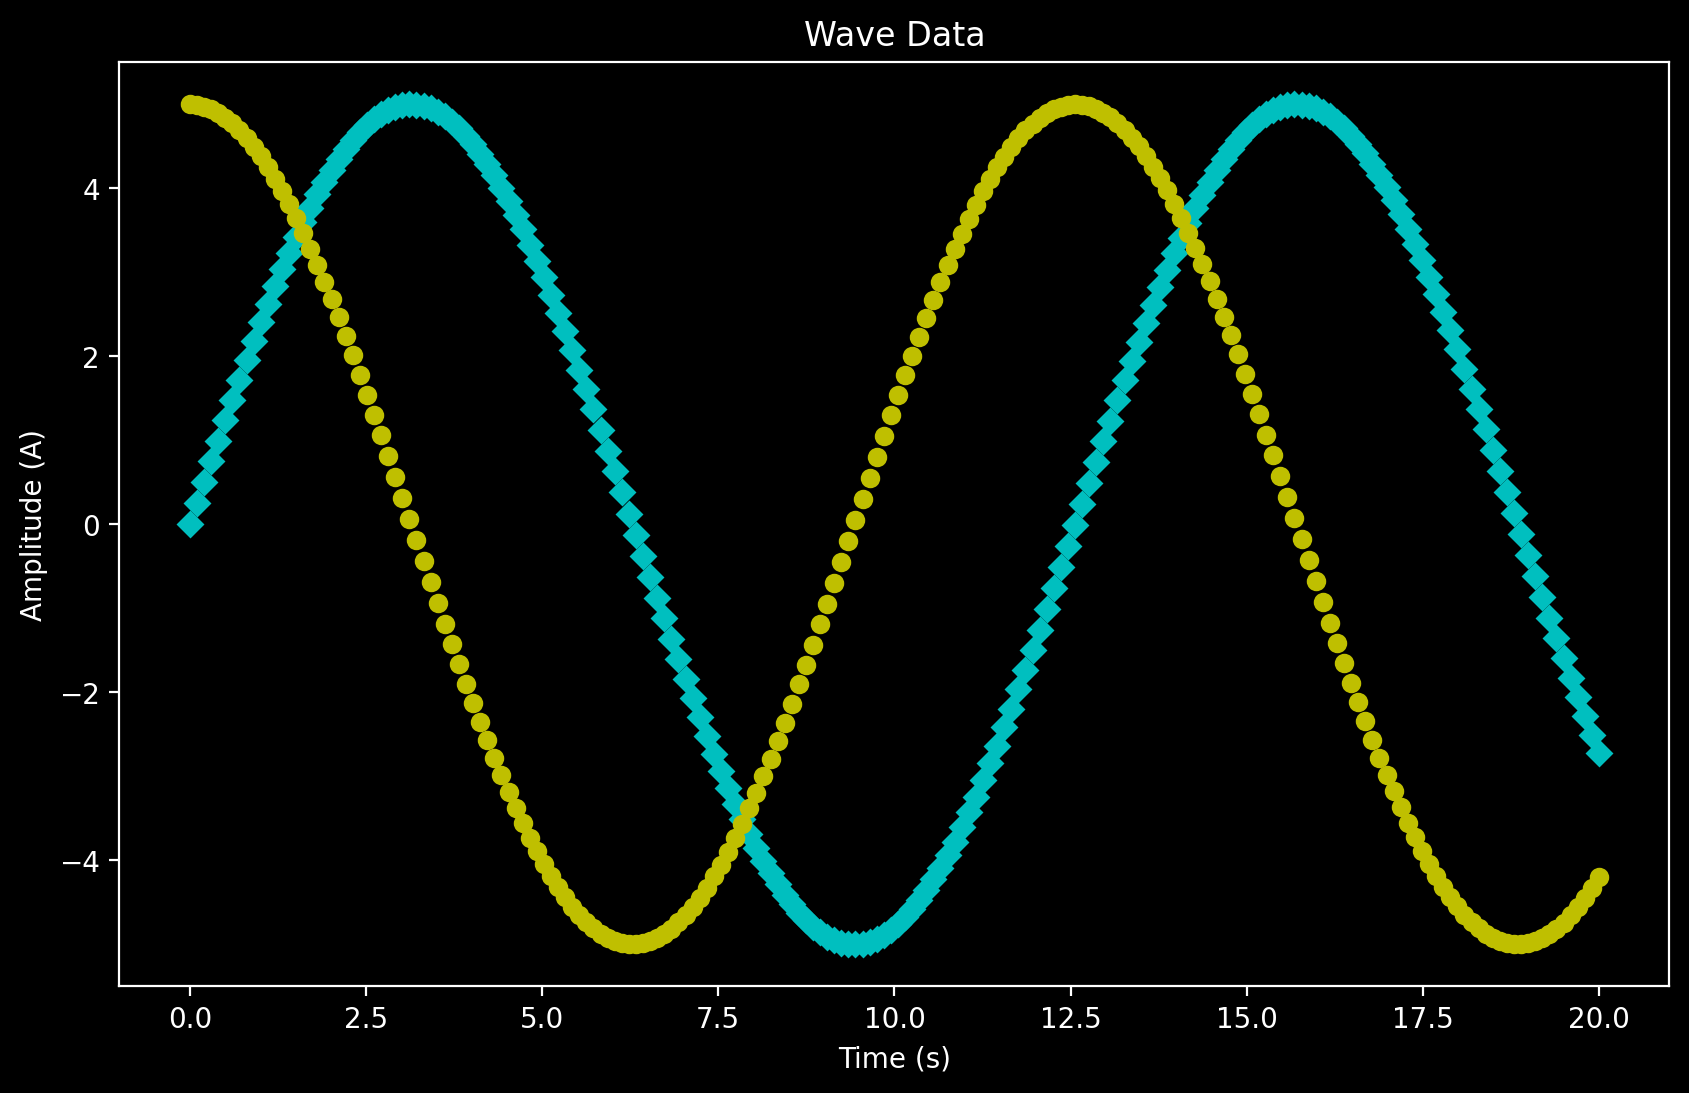

In [28]:
t = np.linspace(0,20,200)
A = float(input("Enter amplitude value (A): " ))
omega = 0.5
y = A*np.sin(omega*t)
z = A*np.cos(omega*t)
plt.figure(figsize=(10,6))
plt.plot(t,y,"cD")
plt.plot(t,z,"yo")
plt.title("Wave Data")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (A)")
plt.show()

### Write a script 2 (22 pts)
#### Importing data for a scatter plot 

Write a code to do the following: 
- Download the file "circuit.txt" from Moodle
    - The first column is of voltage, the second column is of current, and the third column is the uncertainty in the voltage
- Make a scatter plot of the data so that if you knew how to do a linear fit to the data the slope would be resistance. 
- Label the axes with units and title the graph "Voltage and current in a resistor" 
- Add error bars to the plot for the uncertainty in the voltage 

When your program is complete, add a markdown cell below it to explain your process and program. 

### Write a script 3 (22 pts)
#### Creating a plot with axes labels and units! 

Make an interactive plot of 
$$ x = 3e^{(\frac{\pi t^{3/2}}{8})}$$
from 
$$t=0 \;\;\mathrm{to}\;\; t=5\;\mathrm{sec}$$
where $x$ is measured in meters. Once again, google is your friend, and the Matplotlib site has many examples.Make sure that you have a sufficient number of points in your $t$ array so that the plot looks smooth; i.e. 20 points is far to few points!
Make sure that you include axes labels with units.